# INFORMASI DASAR


## Latar Belakang
Sebuah perusahaan memiliki data tentang pelanggan dan promo yang mereka lakukan selama dua tahun terakhir. Pelanggan memiliki latar belakang yang beragam, mulai dari umur, pendidikan, status pernikahan, dan beberapa hal lainnya. Perusahaan juga memiliki data penjualan untuk tiap promosi dan komoditi. Namun, perusahaan masih belum yakin dengan target promosi mereka.

## Rumusan Masalah
Perusahaan ingin mengetahui **faktor apa saja yang mempengaruhi kecenderungan pelanggan untuk melakukan transaksi saat diadakan promo** dan **produk apa yang paling laris dibeli saat promo**. Hal ini akan membantu perusahaan untuk menargetkan promo mereka ke pelanggan yang lebih tepat dan mensuplai stok komoditi yang tepat pula.

# IMPORT

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import normaltest

## Dataset
Kolom pada dataset menggunakan '\t' sebagai separator. Selanjutnya akan ditampilkan 5 baris teratas dan terbawah dari dataset marketin_campaign.

In [2]:
df=pd.read_csv('marketing_campaign.csv', sep='\t')
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


# DATA UNDERSTANDING & CLEANING
Dataset berisi tentang hasil promo sebuah perusahaan yang berisi tentang data pelanggan, produk yang dibeli, promo yang diambil, dan tempat pelanggan melakukan transaksi. Detail untuk tiap kolomnya adalah sebagai berikut :

**People**
* ID: Kode unik untuk pelanggan
* Year_Birth: Tahun lahir pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan rumah tangga tahunan pelanggan
* Kidhome: Jumlah anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan di perusahaan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

**Products**
* MntWines: Pemberlian anggur (minuman) dalam 2 tahun terakhir
* MntFruits: Pemberlian buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Pemberlian daging dalam 2 tahun terakhir
* MntFishProducts: Pemberlian ikan dalam 2 tahun terakhir
* MntSweetProducts: Pemberlian manisan dalam 2 tahun terakhir
* MntGoldProds: Pemberlian emas dalam 2 tahun terakhir

**Promotion**
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima penawaran pada promo pertama, 0 sebaliknya
* AcceptedCmp2: 1 jika pelanggan menerima penawaran pada promo kedua, 0 sebaliknya
* AcceptedCmp3: 1 jika pelanggan menerima penawaran pada promo ketiga, 0 sebaliknya
* AcceptedCmp4: 1 jika pelanggan menerima penawaran pada promo keempat, 0 sebaliknya
* AcceptedCmp5: 1 jika pelanggan menerima penawaran pada promo kelima, 0 sebaliknya
* Response: 1 jika pelanggan menerima penawaran pada promo terakhir, 0 sebaliknya

**Place**
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

*p.s. Dataset diambil dari [sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) dan dimodifikasi oleh Purwadhika*

In [3]:
print('Jumlah baris dan kolom : {} \n'.format(df.shape))
df.info()

Jumlah baris dan kolom : (2240, 29) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  

In [4]:
list_info = []
for col in df.columns :
    list_info.append([[col], df[col].nunique(), df[col].dtypes, df[col].isnull().sum()])

table_info = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Tipe', 'Null sum'], data=list_info)
print(table_info)

              Column Name  Number of Unique     Tipe  Null sum
0                    [ID]              2240    int64         0
1            [Year_Birth]                59    int64         0
2             [Education]                 5   object         0
3        [Marital_Status]                 8   object         0
4                [Income]              1974  float64        24
5               [Kidhome]                 3    int64         0
6              [Teenhome]                 3    int64         0
7           [Dt_Customer]               663   object         0
8               [Recency]               100    int64         0
9              [MntWines]               776    int64         0
10            [MntFruits]               158    int64         0
11      [MntMeatProducts]               558    int64         0
12      [MntFishProducts]               182    int64         0
13     [MntSweetProducts]               177    int64         0
14         [MntGoldProds]               213    int64   

In [5]:
display(df.describe().transpose(), df.describe(include=object).transpose())

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864
Dt_Customer,2240,663,31-08-2012,12


In [6]:
list_unique = []
for col in df.columns :
    print(col, '\n', df[col].unique(), '\n')

ID 
 [5524 2174 4141 ... 7270 8235 9405] 

Year_Birth 
 [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 

Education 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle'] 

Marital_Status 
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'] 

Income 
 [58138. 46344. 71613. ... 56981. 69245. 52869.] 

Kidhome 
 [0 1 2] 

Teenhome 
 [0 1 2] 

Dt_Customer 
 ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11-2012' '08-08-2012' '06-01-2013' '23-12-2012'
 '11-01-2014' '18-03-2013' '02-01-2013' '27-05-2013' '20-02-2013'
 '31-05-2013' '22-11-2013' '22-05-2014' 

## Informasi Dataset
Tedapat beberapa informasi yang diambil dari informasi diatas, yaitu :
* Dataset memiliki volume data sebanyak 2240 baris dan 29 kolom.
* Karena berisi informasi tentang tanggal, tipe data untuk kolom Dt_Customer seharusnya DateTime, sedangkan kolom Year_Birth bisa tetap menggunakan integer untuk mencari umur dari pelanggan nantinya.
* Ada satu kolom yang memiliki sedikit *null value*, yaitu kolom income sebanyak 24 baris.
* Kolom Z_CostContact dan Z_Revenue hanya memiliki satu nilai unik, sehingga kolom ini bisa diabaikan di analisis.

## Perbaikan Tipe Data
Sebelum melakukan perubahan, sebuah backup dataframe dibuat dengan nama *df_backup* untuk mengantisipasi jika nantinya dataframe awal dibutuhkan kembali. Data pada kolom *Dt_Costumer* dan *Year_Birth* merupakan data waktu, tetapi di dataset *Dt_Costumer* dan *Year_Birth* masing-masing memiliki jenis data object dan integer. Sehingga harus diubah ke format DateTime.

In [7]:
#membuat salinan dataframe untuk backup
df_backup = df.copy()

In [8]:
#mengubah kolom Dt_Customer ke DateTime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format= '%Y')

df.dtypes

ID                              int64
Year_Birth             datetime64[ns]
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [9]:
#Menampilkan data yang memiliki missing values
display(df[df['Income'].isnull()==True].describe(), df.describe())

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.0,24.0,24.0,24.000000
mean,5943.625000,NaN,0.666667,0.583333,58.041667,197.208333,21.333333,162.708333,27.166667,30.208333,...,5.083333,0.0,0.125000,0.041667,0.083333,0.0,0.0,3.0,11.0,0.041667
std,3028.349268,NaN,0.637022,0.583592,29.492046,242.479758,38.310705,339.420411,41.281290,58.488928,...,2.586195,0.0,0.337832,0.204124,0.282330,0.0,0.0,0.0,0.0,0.204124
min,1295.000000,NaN,0.000000,0.000000,4.000000,5.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
25%,3063.250000,NaN,0.000000,0.000000,35.500000,22.000000,1.000000,14.500000,2.000000,1.500000,...,3.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
50%,5526.500000,NaN,1.000000,1.000000,62.000000,76.000000,3.500000,35.000000,8.000000,4.000000,...,6.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
75%,8597.750000,NaN,1.000000,1.000000,82.250000,286.000000,24.250000,177.000000,40.750000,31.750000,...,7.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3.0,11.0,0.000000
max,10629.000000,NaN,2.000000,2.000000,96.000000,861.000000,138.000000,1607.000000,164.000000,263.000000,...,9.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,3.0,11.0,1.000000


,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


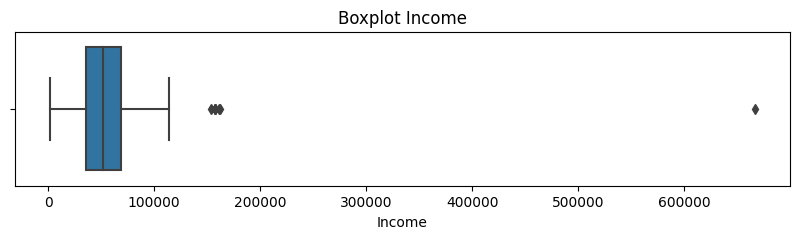

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0


In [10]:
#Melihat distribusi data dari kolom Income
plt.figure(figsize=(10,2))
plt.title('Boxplot Income')
sns.boxplot(x=df.Income)
plt.show()
display(df['Income'].describe().reset_index().transpose())

## Deal with missing values
Dari boxplot bisa dilihat ada beberapa outliers, untuk data yang masuk dalam kategori outliers dicari dengan IQR.<br>
IQR = Q3 - Q1 = 68522 - 35303 = **33219**<br>
Batas atas = Q3 + (1.5 x IQR) = 68522 + (1.5 X 33219) = **118350.5**<br>
Batas bawah = Q1 + (1.5 x IQR) = 35303 - (1.5 X 33219) = **-14525.5**<br>
Karena tidak ada data pada kolom *Income* bernilai negatif, maka nol digunakan sebagai batas bawah, sehingga rentang batas data yang bukan outliers adalah **0** hingga **118350.5**<br><br>

Untuk mengetahui distribusi dengan lebih baik, maka data outliers akan dihilangkan saat melakukan analisis dan dikembalikan lagi setelah analisis agar volume dataframe tetap utuh.<br><br>

Berdasatkan penjelasan dari [sini](https://www.scribbr.com/statistics/missing-data/), terdapat tiga cara untuk memperbaiki *missing value*, yaitu dibiarkan tanpa data, dihapus dari dataframe, dan diganti dengan data yang relevan. Untuk mempertahankan agar dataframe tetap utuh, maka pilihan terbaik adalah mengganti data yang kosong dengan data yang relevan, untuk kasus ini *mean* atau *median* dari kolom yang sama.<br><br>

Dengan nilai p-value dibawah 5% maka reject Ho, data tidak terdistribusi normal. Dikarenakan data pada kolom Income tidak terdistribusi normal, data yang kosong pada kolom ini akan diisi dengan nilai median dari kolom *Income*, karena *measure of central tendency* yang tepat adalah median.

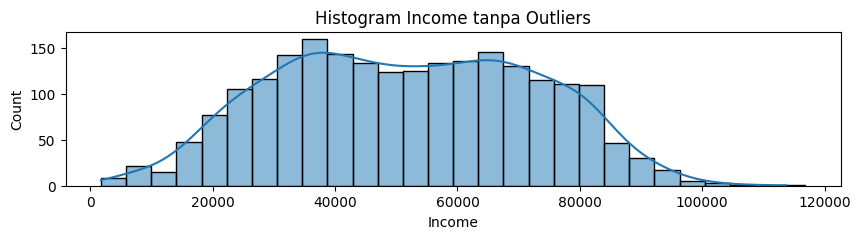

Jumlah outliers : 8


In [11]:
#Membuat plot histogram dari kolom income tanpa outliers
IncomeNoOutliers = df[(df['Income']>=0) & (df['Income']<=118350.5)].reset_index()
plt.figure(figsize=(10,2))
plt.title('Histogram Income tanpa Outliers')
sns.histplot(x=IncomeNoOutliers.Income, kde=True, binwidth=4112)
plt.show()
print('Jumlah outliers : {}'.format(df['Income'].count()-IncomeNoOutliers['Income'].count()))

In [12]:
stats, pval=normaltest(IncomeNoOutliers['Income'])
print('p-value = {}'.format(pval))
if pval<=0.05:
    print('Tidak terdistribusi normal') #Ha
else: 
    print('Distribusi normal') #Ho

p-value = 5.2535220730746056e-51
Tidak terdistribusi normal


In [13]:
#Mengisi nilai yang kosong pada kolom Income dengan nilai median
df['Income'].fillna(value = IncomeNoOutliers['Income'].median(numeric_only=True), inplace = True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Membuat Beberapa Kolom Tambahan

Ada beberapa kolom tambahan yang bisa dibuat untuk memberikan data yang lebih baik untuk analisis.
* **Age** : berisi data umur dari pelanggan, umur dari pelanngan dihitung saat pelanggan melakukan transaksi. Nilai umur didapat dari melakukan pengurangan dari tahun transaksi dilakukan dengan tahun lahir pelanggan.
* **Partner** : merupakan simplifikasi dari data Martial_Status
* **AgeGroup** : berisi bin untuk umur pelanggan dengan rentang tertentu
* **Campaign** : menggabungkan kolom tentang penerimaan promo, yaitu kolom *AcceptCmp1-5* dan *Response*

In [14]:
#Menghitung umur pelanggan dan menampungnnya di kolom Age
df['Age'] = (df['Dt_Customer'].dt.year) - (df['Year_Birth'].dt.year)

In [15]:
# Membuat kolom partner
df['Partner'] = df['Marital_Status'].replace({'Married':'Yes', 'Together':'Yes', 'Absurd':'No', 'Widow':'No', 'YOLO':'No', 'Divorced':'No', 'Single':'No', 'Alone':'No'})
print(df['Partner'].value_counts())

Yes    1444
No      796
Name: Partner, dtype: int64


In [16]:
# Membuat kolom children
df['Children'] = df['Kidhome'] + df['Teenhome']
print(df['Children'].value_counts())

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64


In [17]:
# Binding kolom Age
df['AgeGroup'] = pd.cut(x = df['Age'], bins = [0,13,17,25,50,150], labels = ['Child','Teens','Young Adult','Adult','Old'])
print(df['AgeGroup'].unique())

['Old', 'Adult', 'Young Adult', 'Teens']
Categories (5, object): ['Child' < 'Teens' < 'Young Adult' < 'Adult' < 'Old']


In [18]:
# Menggabungkan kolom promo
for idx in df.index :
    df.loc[idx, "Campaign"] = df['AcceptedCmp1'].astype(bool)[idx] or df['AcceptedCmp2'].astype(bool)[idx] or df['AcceptedCmp3'].astype(bool)[idx] or df['AcceptedCmp4'].astype(bool)[idx] or df['AcceptedCmp5'].astype(bool)[idx] or df['Response'].astype(bool)[idx]
    if df.loc[idx, "Campaign"]==True :
        df.loc[idx, "Campaign"]='Accept Campaign'
    else :
        df.loc[idx, "Campaign"]='No Campaign'
df['Campaign'].value_counts()

No Campaign        1631
Accept Campaign     609
Name: Campaign, dtype: int64

## Menghapus kolom yang kurang relevan untuk analisis
Analisis terfokus pada penerima promosi dan hubungannya dengan kolom-kolom yang lain. Ada beberapa kolom yang bisa dihapus karena tidak relevan, sudah memiliki pengganti, atau hanya memiliki satu nilai.
* **ID** : merupakan nilai unik dari data, bisa dihapus karena tidak akan mempengaruhi data yang lain
* **Marital_Status** : tergantikan oleh kolom Partner dengan nilai yang lebih ringkas
* **Year_Birth** : tergantikan oleh kolom Age yang lebih informatif
* **KidHome**, **TeenHome** : tergantikan oleh kolom Children dengan nilai yang lebih ringkas
* **AcceptedCmp1-5**, **Response** : tergantikan oleh kolom Campaign dengan nilai yang lebih ringkas
* **NumWebVisitsMonth**,**Recency**,**Dt_Customer**,**NumDealsPurchases**,**Complain** : data mengenai kunjungan ke web, waktu pembelian terakhir, tanggal transaksi, pembelian saat diskon, dan komplain tidak relevan untuk analisis penerima promo
* **Z_CostContact**, **Z_Revenue** : hanya memiliki satu nilai unik

In [19]:
# Drop kolom yang tidak dibutuhkan
df.drop(['ID','Marital_Status','Year_Birth','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
         'AcceptedCmp5','Response','NumWebVisitsMonth','Recency','Dt_Customer','NumDealsPurchases','Complain','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
display(df.head(), df.tail())

,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Age,Partner,Children,AgeGroup,Campaign
0,Graduation,58138.0,635,88,546,172,88,88,8,10,4,55,No,0,Old,Accept Campaign
1,Graduation,46344.0,11,1,6,2,1,6,1,1,2,60,No,2,Old,No Campaign
2,Graduation,71613.0,426,49,127,111,21,42,8,2,10,48,Yes,0,Adult,No Campaign
3,Graduation,26646.0,11,4,20,10,3,5,2,0,4,30,Yes,1,Adult,No Campaign
4,PhD,58293.0,173,43,118,46,27,15,5,3,6,33,Yes,1,Adult,No Campaign


,Education,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Age,Partner,Children,AgeGroup,Campaign
2235,Graduation,61223.0,709,43,182,42,118,247,9,3,4,46,Yes,1,Adult,No Campaign
2236,PhD,64014.0,406,0,30,0,0,8,8,2,5,68,Yes,3,Old,Accept Campaign
2237,Graduation,56981.0,908,48,217,32,12,24,2,3,13,33,No,0,Adult,Accept Campaign
2238,Master,69245.0,428,30,214,80,30,61,6,5,10,58,Yes,1,Old,No Campaign
2239,PhD,52869.0,84,3,61,2,1,21,3,1,4,58,Yes,2,Old,Accept Campaign


## Perbaikan Label
* Mengganti value pada kolom edukasi ke istilah yang lebih umum.
* Mengubah beberapa nama kolom sehingga lebih mudah dimengerti

In [20]:
# Memperbaiki kategori edukasi
df['Education']=df['Education'].replace({'Basic':'Undergraduate', 'Graduation':'Bachelor','2n Cycle':'Master', 'PhD':'Doctor'})
print(df['Education'].value_counts())

Bachelor         1127
Master            573
Doctor            486
Undergraduate      54
Name: Education, dtype: int64


In [21]:
# Memperbaiki nama beberapa kolom
df = df.rename(columns={'MntWines': 'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet',
                        'MntGoldProds':'Gold','NumWebPurchases':'PurchasesInWeb',
                        'NumCatalogPurchases':'PurchasesInCatalog','NumStorePurchases':'PurchasesInStore'})
display(df.head(), df.tail())
df.info()

,Education,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,PurchasesInWeb,PurchasesInCatalog,PurchasesInStore,Age,Partner,Children,AgeGroup,Campaign
0,Bachelor,58138.0,635,88,546,172,88,88,8,10,4,55,No,0,Old,Accept Campaign
1,Bachelor,46344.0,11,1,6,2,1,6,1,1,2,60,No,2,Old,No Campaign
2,Bachelor,71613.0,426,49,127,111,21,42,8,2,10,48,Yes,0,Adult,No Campaign
3,Bachelor,26646.0,11,4,20,10,3,5,2,0,4,30,Yes,1,Adult,No Campaign
4,Doctor,58293.0,173,43,118,46,27,15,5,3,6,33,Yes,1,Adult,No Campaign


,Education,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,PurchasesInWeb,PurchasesInCatalog,PurchasesInStore,Age,Partner,Children,AgeGroup,Campaign
2235,Bachelor,61223.0,709,43,182,42,118,247,9,3,4,46,Yes,1,Adult,No Campaign
2236,Doctor,64014.0,406,0,30,0,0,8,8,2,5,68,Yes,3,Old,Accept Campaign
2237,Bachelor,56981.0,908,48,217,32,12,24,2,3,13,33,No,0,Adult,Accept Campaign
2238,Master,69245.0,428,30,214,80,30,61,6,5,10,58,Yes,1,Old,No Campaign
2239,Doctor,52869.0,84,3,61,2,1,21,3,1,4,58,Yes,2,Old,Accept Campaign


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Education           2240 non-null   object  
 1   Income              2240 non-null   float64 
 2   Wines               2240 non-null   int64   
 3   Fruits              2240 non-null   int64   
 4   Meat                2240 non-null   int64   
 5   Fish                2240 non-null   int64   
 6   Sweet               2240 non-null   int64   
 7   Gold                2240 non-null   int64   
 8   PurchasesInWeb      2240 non-null   int64   
 9   PurchasesInCatalog  2240 non-null   int64   
 10  PurchasesInStore    2240 non-null   int64   
 11  Age                 2240 non-null   int64   
 12  Partner             2240 non-null   object  
 13  Children            2240 non-null   int64   
 14  AgeGroup            2240 non-null   category
 15  Campaign            2240 non-null   ob

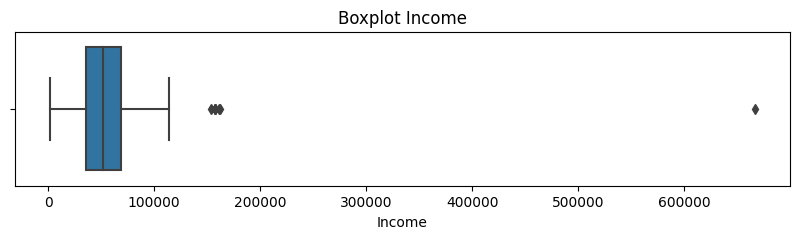

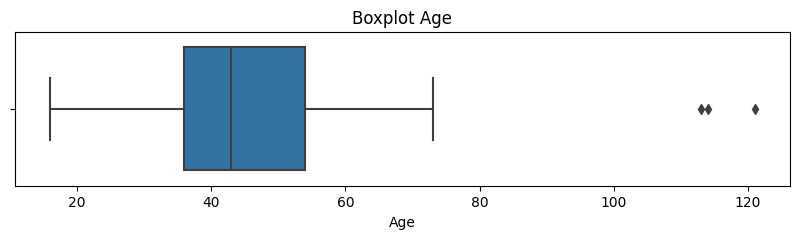

In [22]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Age", "TotalSpent"]
plt.figure(figsize=(10,2))
plt.title('Boxplot Income')
sns.boxplot(x = df.Income)
plt.show()

plt.figure(figsize=(10,2))
plt.title('Boxplot Age')
sns.boxplot(x = df.Age)
plt.show()

## Outliers
* Untuk kolom *Income*, terdapat satu data outliers yang terlalu jauh dari data yang lain sehingga baris dari data tersebut akan dihapus dari dataframe karena hanya ada satu pelanggan dengan income sebesar itu sehingga tidak merepresentasikan populasi. Outliers dihapus dengan menggunakan 200k sebagai batas income.
* Outliers pada kolom *Age* akan tetap dipakai pada analisis karena sudah ada kolom *AgeGroup* yang memberikan representasi yang lebih baik untuk analisis. Umur pada rentang tersebut masih dapat dimasukkan dalam kategori yang sama dengan data umur yang lain.

In [23]:
# Menghapus outliers yang tidak diinginkan pada kolom Income
df = df[(df["Income"]<200000)]
print('Jumlah outliers yang dihapus : {}'.format(len(df_backup)-len(df)))

Jumlah outliers yang dihapus : 1


## Cleaned Dataframe
Setelah proses cleaning, dataframe memiliki 2239 baris dan 16 kolom.

In [24]:
display(df.head(), df.tail())

,Education,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,PurchasesInWeb,PurchasesInCatalog,PurchasesInStore,Age,Partner,Children,AgeGroup,Campaign
0,Bachelor,58138.0,635,88,546,172,88,88,8,10,4,55,No,0,Old,Accept Campaign
1,Bachelor,46344.0,11,1,6,2,1,6,1,1,2,60,No,2,Old,No Campaign
2,Bachelor,71613.0,426,49,127,111,21,42,8,2,10,48,Yes,0,Adult,No Campaign
3,Bachelor,26646.0,11,4,20,10,3,5,2,0,4,30,Yes,1,Adult,No Campaign
4,Doctor,58293.0,173,43,118,46,27,15,5,3,6,33,Yes,1,Adult,No Campaign


,Education,Income,Wines,Fruits,Meat,Fish,Sweet,Gold,PurchasesInWeb,PurchasesInCatalog,PurchasesInStore,Age,Partner,Children,AgeGroup,Campaign
2235,Bachelor,61223.0,709,43,182,42,118,247,9,3,4,46,Yes,1,Adult,No Campaign
2236,Doctor,64014.0,406,0,30,0,0,8,8,2,5,68,Yes,3,Old,Accept Campaign
2237,Bachelor,56981.0,908,48,217,32,12,24,2,3,13,33,No,0,Adult,Accept Campaign
2238,Master,69245.0,428,30,214,80,30,61,6,5,10,58,Yes,1,Old,No Campaign
2239,Doctor,52869.0,84,3,61,2,1,21,3,1,4,58,Yes,2,Old,Accept Campaign


In [25]:
print('Jumlah baris dan kolom : {} \n'.format(df.shape))
df.info()

Jumlah baris dan kolom : (2239, 16) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Education           2239 non-null   object  
 1   Income              2239 non-null   float64 
 2   Wines               2239 non-null   int64   
 3   Fruits              2239 non-null   int64   
 4   Meat                2239 non-null   int64   
 5   Fish                2239 non-null   int64   
 6   Sweet               2239 non-null   int64   
 7   Gold                2239 non-null   int64   
 8   PurchasesInWeb      2239 non-null   int64   
 9   PurchasesInCatalog  2239 non-null   int64   
 10  PurchasesInStore    2239 non-null   int64   
 11  Age                 2239 non-null   int64   
 12  Partner             2239 non-null   object  
 13  Children            2239 non-null   int64   
 14  AgeGroup            2239 non-null   category
 15  

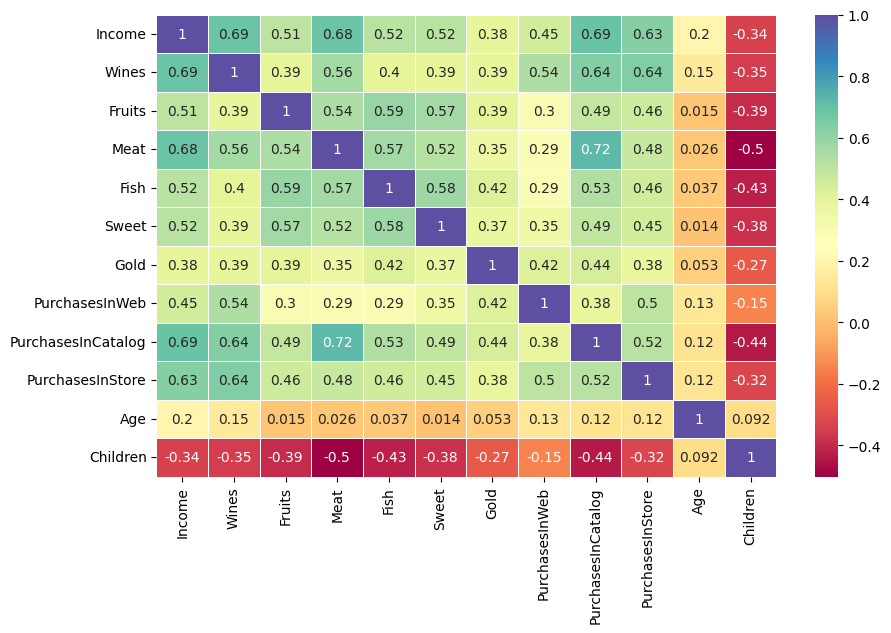

In [26]:
#Melihat korelasi antar kolom yang memiliki nilai numerikal
corr = df.corr(numeric_only=True)
plt.figure(figsize = (10,6))
sns.heatmap(data = corr, cmap = 'Spectral', annot = True, linewidth=.5)
plt.show()

In [27]:
#df.to_csv('marketing_campaign_clean.csv', sep='\t', encoding='utf-8')

# ANALYSIS
Setelah melewati tahap **Data Cleaning**, selanjutnya melakukan analisis untuk mengetahui **hubungan antara penerimaan promo (*campaign*) dengan variabel yang berkaitan dengan pelanggan dan kegiatan belanjanya**.<br><br>
Analisis lebih berpusat pada kolom *Campaign* yang berisi data tentang apakah transaksi yang dilakukan saat pelanggan menerima tawaran promo (Accept Campaign) atau tidak (No Campaign).

## Pengaruh Income terhadap Promo

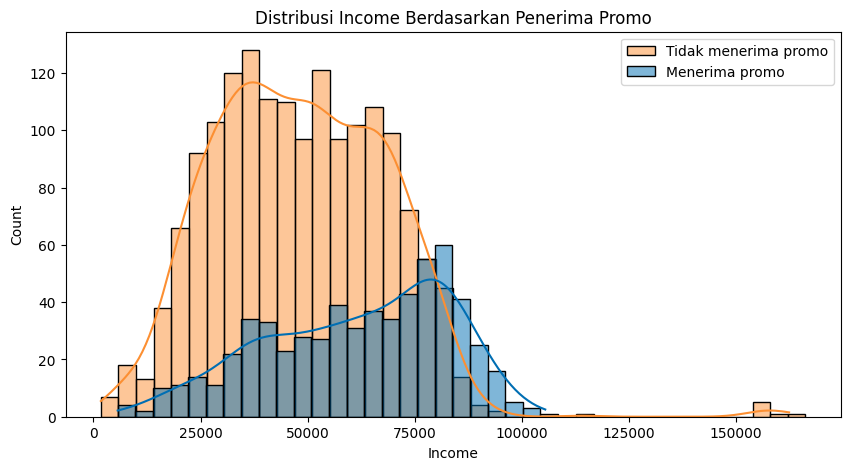

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Campaign']=='No Campaign']['Income'],label='Tidak menerima promo', kde=True, color='#FC8F32', binwidth=4112)
sns.histplot(df[df['Campaign']=='Accept Campaign']['Income'],label='Menerima promo', kde=True, color='#006EB3', binwidth=4112)
plt.title('Distribusi Income Berdasarkan Penerima Promo')
plt.legend()
plt.show()

In [29]:
# cek distribusi kolom Income
from scipy.stats import normaltest
stats, p_value=normaltest(df['Income'])
if p_value<=0.05:
    print('Tidak terdistribusi normal') #Ha
else: 
    print('Terdistribusi normal') #Ho
print('p_value : {}'.format(p_value))

Tidak terdistribusi normal
p_value : 1.2521772066161065e-16


In [30]:
from scipy.stats import mannwhitneyu
# uji statistik, apakah ada perbedaan income antara pelanggan yang mendapat 
# karena distribusi data tidak normal, gunakan mann whitney
not_acc = df[df['Campaign'] == 'No Campaign']['Income']
acc = df[df['Campaign'] == 'Accept Campaign']['Income']
stats,p_value=mannwhitneyu(not_acc, acc)
if p_value <= 0.05:
    print('Tolak Ho, ada perbedaan distribusi income antara penerima promo dan bukan') #Ha
else:
    print('Terima Ho, tidak perbedaan distribusi income antara penerima promo dan bukan') #Ho
print(p_value)

Tolak Ho, ada perbedaan distribusi income antara penerima promo dan bukan
8.332508774367398e-42


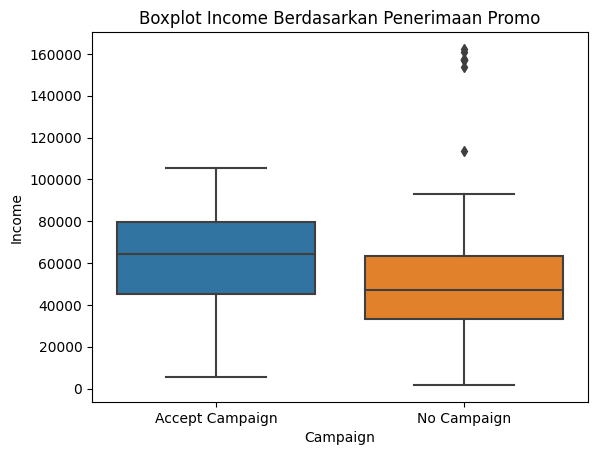

In [31]:
sns.boxplot(y='Income', x='Campaign', data=df)
plt.title('Boxplot Income Berdasarkan Penerimaan Promo')
plt.show()

Temuan<br>
* Dari hasil statistik tes, ternyata memang benar income dari pelanggan yang menerima promo cenderung berbeda dengan yang tidak menerima promo.
* Dilihat dari plot histogram dan boxplot, sebaran pelanggan yang memiliki income lebih rendah cenderung tidak menerima promo dibandingkan yang lebih rendah, kemungkinan yang terjadi adalah pelanggan yang memiliki income yang lebih tinggi lebih sering berbelanja sehingga memperbesar kemungkinan untuk mendapatkan promo.

## Hubungan antara Jenis Barang yang Dibeli dengan Promo

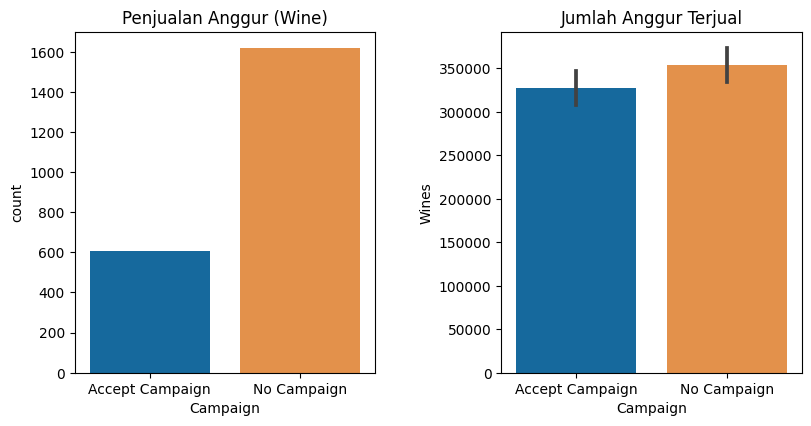

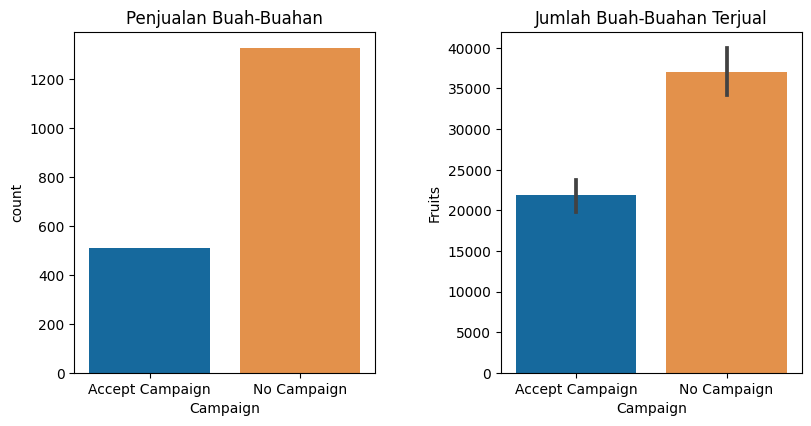

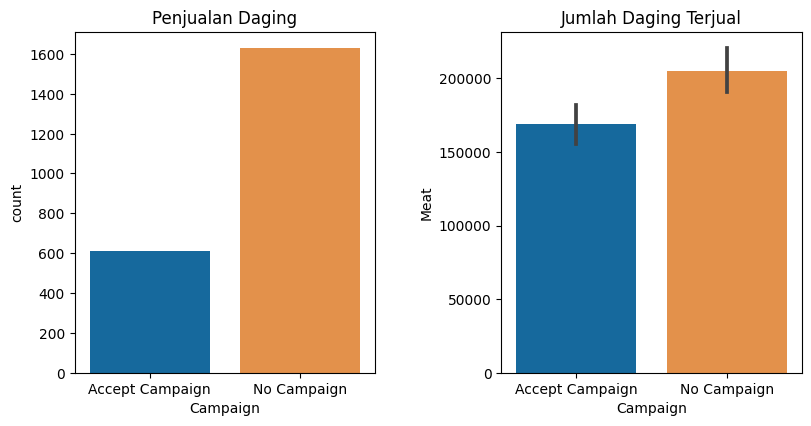

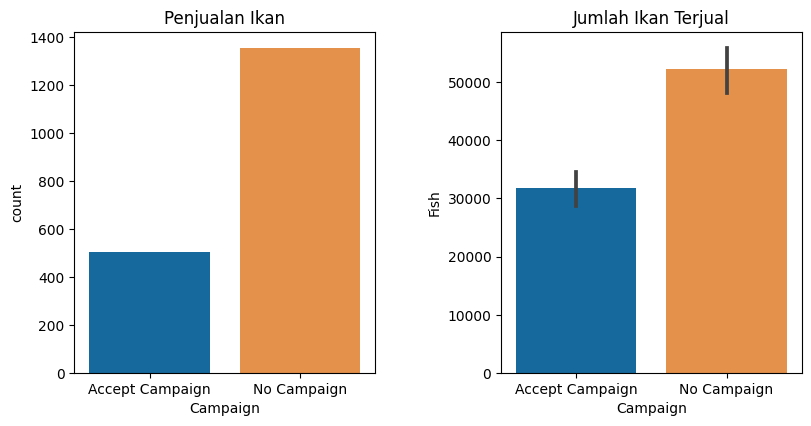

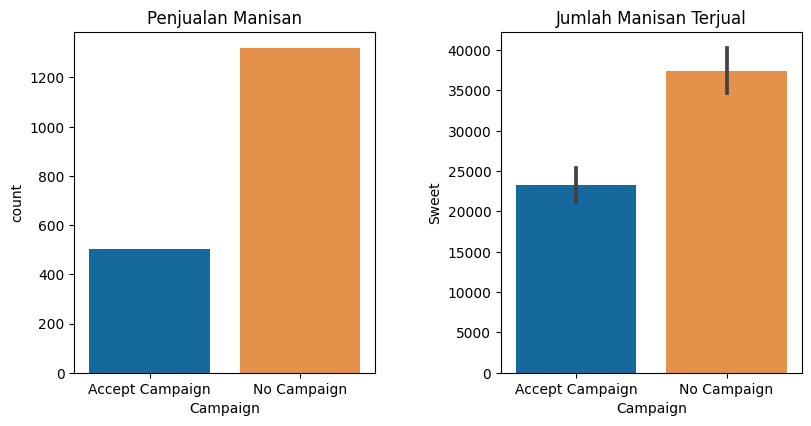

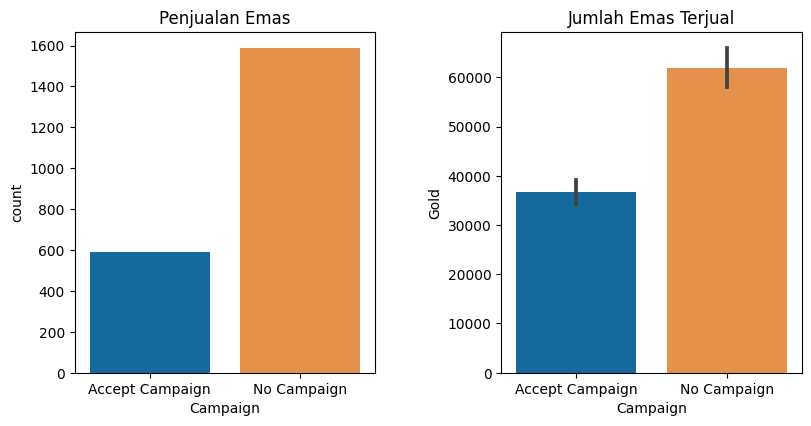

In [32]:
pal=['#006EB3','#FC8F32']
# Plot Campaign vs Wines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Wines']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Anggur (Wine)')
sns.barplot(data=df[df['Wines']>0], x='Campaign', y="Wines", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Anggur Terjual')
plt.show()

# Plot Campaign vs Fruits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Fruits']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Buah-Buahan')
sns.barplot(data=df[df['Fruits']>0], x='Campaign', y="Fruits", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Buah-Buahan Terjual')
plt.show()

# Plot Campaign vs Meat
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Meat']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Daging')
sns.barplot(data=df[df['Meat']>0], x='Campaign', y="Meat", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Daging Terjual')
plt.show()

# Plot Campaign vs Fish
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Fish']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Ikan')
sns.barplot(data=df[df['Fish']>0], x='Campaign', y="Fish", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Ikan Terjual')
plt.show()

# Plot Campaign vs Sweet
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Sweet']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Manisan')
sns.barplot(data=df[df['Sweet']>0], x='Campaign', y="Sweet", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Manisan Terjual')
plt.show()

# Plot Campaign vs Gold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['Gold']>0], x='Campaign', palette=pal, ax = ax1)
ax1.set_title('Penjualan Emas')
sns.barplot(data=df[df['Gold']>0], x='Campaign', y="Gold", palette=pal, estimator=sum, ax = ax2)
ax2.set_title('Jumlah Emas Terjual')
plt.show()

Temuan<br>
* Secara umum, transaksi pembelian barang lebih sering dilakukan tanpa promo. Ini sudah jelas, karena promo biasanya sifatnya dilaksanakan dalam waktu yang terbatas.
* Meskipun jumah transaksi yang lebih kecil, ternyata kalau dilihat dari volume belanja, pembelian dengan promo berjumlah lebih banyak jika dilihat dari proporsi transaksi yang terjadi.
* Proporsi transaksi pembelian untuk tiap komoditi cenderung sama untuk pembelian dengan promo atau tidak.
* Wine dan daging merupakan komoditi yang paling banyak dibeli jika ada promo dibandingkan pembelian tanpa promo.

## Hubungan antara Tempat Pembelian Barang dengan Promo

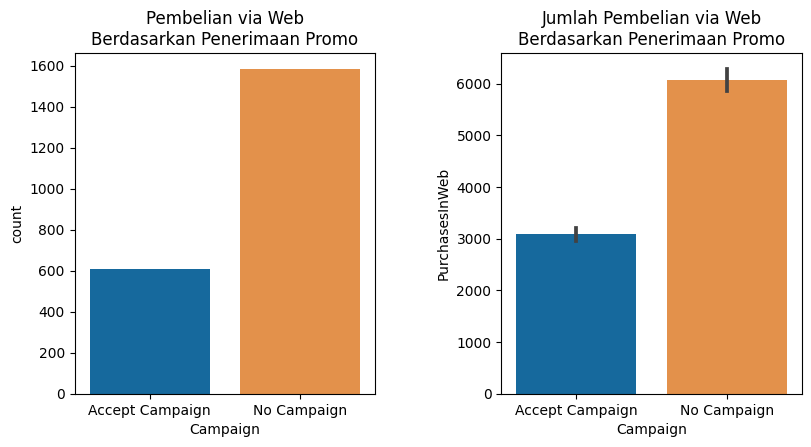

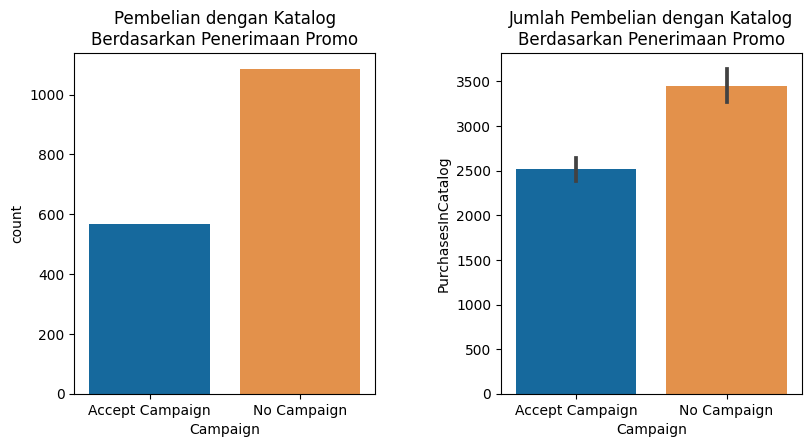

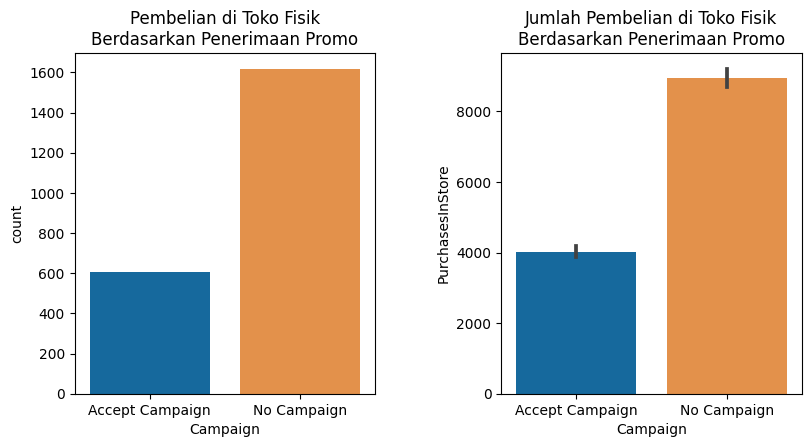

In [33]:
pal2=['#006EB3','#FC8F32']
# Plot Campaign vs PurchasesInWeb
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['PurchasesInWeb']>0], x='Campaign', palette=pal2, ax = ax1)
ax1.set_title('Pembelian via Web\nBerdasarkan Penerimaan Promo')
sns.barplot(data=df[df['PurchasesInWeb']>0], x='Campaign', y='PurchasesInWeb', estimator=sum, palette=pal2, ax = ax2)
ax2.set_title('Jumlah Pembelian via Web\nBerdasarkan Penerimaan Promo')
plt.show()

# Plot Campaign vs PurchasesInCatalog
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['PurchasesInCatalog']>0], x='Campaign', palette=pal2, ax = ax1)
ax1.set_title('Pembelian dengan Katalog\nBerdasarkan Penerimaan Promo')
sns.barplot(data=df[df['PurchasesInCatalog']>0], x='Campaign', y='PurchasesInCatalog', estimator=sum, palette=pal2, ax = ax2)
ax2.set_title('Jumlah Pembelian dengan Katalog\nBerdasarkan Penerimaan Promo')
plt.show()

# Plot Campaign vs PurchasesInStore
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
fig.tight_layout(w_pad=6)
sns.countplot(data=df[df['PurchasesInStore']>0], x='Campaign', palette=pal2, ax = ax1)
ax1.set_title('Pembelian di Toko Fisik\nBerdasarkan Penerimaan Promo')
sns.barplot(data=df[df['PurchasesInStore']>0], x='Campaign', y='PurchasesInStore', estimator=sum, palette=pal2, ax = ax2)
ax2.set_title('Jumlah Pembelian di Toko Fisik\nBerdasarkan Penerimaan Promo')
plt.show()

Temuan<br>
* Pelanggan yang melakukan transaksi dengan promo di ketiga tempat belanja yang ada memiliki jumlah yang sama, yaitu sekitar 600 pelanggan. Tetapi secara persentase, pelanggan yang belanja dengan katalog lebih cenderung melakukan transaksi saat promo dibandingkan yang terjadi pada pembelian di web atau toko fisik.
* Volume transaksi belanja paling besar terjadi di toko fisik, dan pembelian dengan promo paling banyak terjadi pada toko fisik juga. Namun, untuk persentase, pembelian dengan katalog memiliki persentase volume belanja yang lebih besar. Kemungkinan ini karena pelanggan yang berbelanja dengan katalog lebih fokus dengan deals atau promo yang ada di katalog dibandingkan barang yang lain.

## Hubungan antara Umur Pelanggan dengan Promo

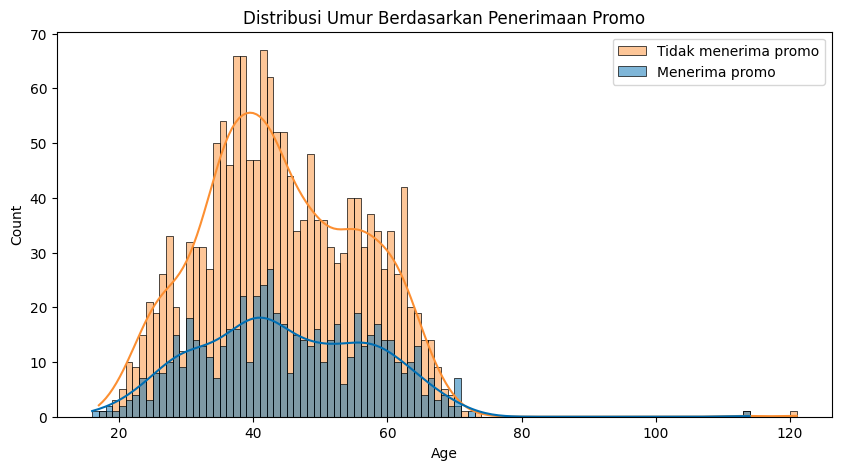

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['Campaign']=='No Campaign']['Age'],label='Tidak menerima promo', kde=True, color='#FC8F32', binwidth=1)
sns.histplot(df[df['Campaign']=='Accept Campaign']['Age'],label='Menerima promo', kde=True, color='#006EB3', binwidth=1)
plt.title('Distribusi Umur Berdasarkan Penerimaan Promo')
plt.legend()
plt.show()

In [35]:
df['Age'].value_counts()

41     91
42     89
38     88
37     82
43     71
       ..
16      1
114     1
71      1
72      1
73      1
Name: Age, Length: 61, dtype: int64

In [36]:
df_age=pd.crosstab(df['Age'],df['Campaign'])
df_age['Total']=df_age.sum(axis=1)
df_age.sort_values('Accept Campaign', ascending=False)

Campaign,Accept Campaign,No Campaign,Total
Age,,,
42,27,62,89
41,24,67,91
40,22,47,69
38,22,66,88
43,19,52,71
...,...,...,...
19,1,3,4
71,0,1,1
73,0,1,1


In [37]:
# cek distribusi kolom Age
from scipy.stats import normaltest
stats, p_value=normaltest(df['Age'])
if p_value<=0.05:
    print('Tidak terdistribusi normal') #Ha
else: 
    print('Terdistribusi normal') #Ho
print('p_value : {}'.format(p_value))

Tidak terdistribusi normal
p_value : 2.0325656867245625e-16


In [38]:
from scipy.stats import mannwhitneyu
# uji statistik, apakah ada perbedaan distribusi umur antara pelanggan yang mendapat 
# karena distribusi data tidak normal, gunakan mann whitney
not_acc = df[df['Campaign'] == 'No Campaign']['Age']
acc = df[df['Campaign'] == 'Accept Campaign']['Age']
stats,p_value=mannwhitneyu(not_acc, acc)
if p_value <= 0.05:
    print('Tolak Ho, ada perbedaan distribusi umur antara penerima promo dan bukan') #Ha
else:
    print('Terima Ho, tidak perbedaan distribusi umur antara penerima promo dan bukan') #Ho
print(p_value)

Terima Ho, tidak perbedaan distribusi umur antara penerima promo dan bukan
0.21804509126974603


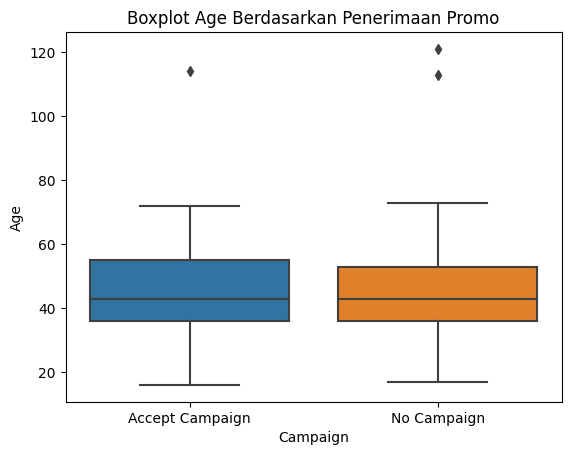

In [39]:
sns.boxplot(y='Age', x='Campaign', data=df)
plt.title('Boxplot Age Berdasarkan Penerimaan Promo')
plt.show()

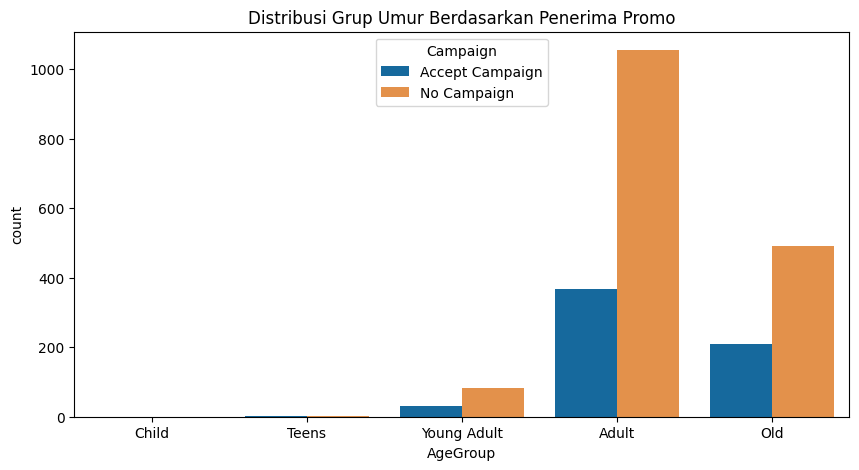

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='AgeGroup', hue='Campaign', palette=pal)
plt.title('Distribusi Grup Umur Berdasarkan Penerima Promo')
plt.show()

In [41]:
df_group=pd.crosstab(df['AgeGroup'],df['Campaign'])
df_group['Total']=df_group.sum(axis=1)
df_group.sort_values('AgeGroup')

Campaign,Accept Campaign,No Campaign,Total
AgeGroup,,,
Teens,2,1,3
Young Adult,30,83,113
Adult,367,1055,1422
Old,210,491,701


Temuan<br>
* Dari hasil tes statistik, distribusi umur untuk pelanggan yang berbelanja dengan promo atau tidak memiliki distribusi yang sama. Dapat dikatakan bahwa umur tidak memiliki pengaruh ke kecenderungan pelanggan melakukan transaksi saat promo atau tidak.

## Hubungan antara Keberadaan Partner dengan Promo

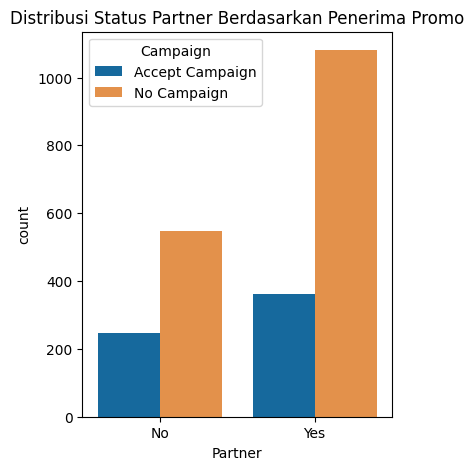

In [42]:
plt.figure(figsize=(4,5))
sns.countplot(data=df, x='Partner', hue='Campaign', palette=pal)
plt.title('Distribusi Status Partner Berdasarkan Penerima Promo')
plt.show()

In [43]:
df_partner=pd.crosstab(df['Partner'],df['Campaign'])
df_partner['Total']=df_partner.sum(axis=1)
df_partner

Campaign,Accept Campaign,No Campaign,Total
Partner,,,
No,247,549,796
Yes,362,1081,1443


Temuan<br>
* Pelanggan yang tidak memiliki partner cenderung melakukan transaksi saat promo. Ini wajar, karena pelanggan hanya akan fokus pada dirinya sendiri saat berbelanja, dibandingkan saat ada partner yang kemungkinan punya kebutuhan lain yang tidak sesuai dengan promo yang ada.

## Hubungan antara Jumlah Anak dari Pelanggan dengan Promo

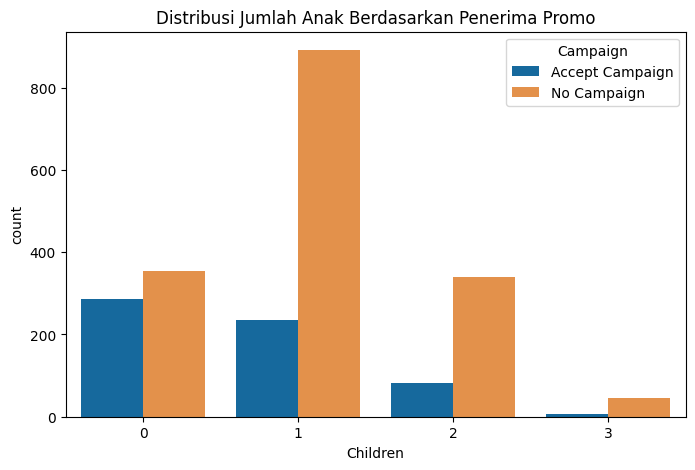

In [44]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Children', hue='Campaign', palette=pal)
plt.title('Distribusi Jumlah Anak Berdasarkan Penerima Promo')
plt.show()

In [45]:
df_children=pd.crosstab(df['Children'],df['Campaign'])
df_children['Total']=df_children.sum(axis=1)
df_children['Persentase']=df_children['Accept Campaign']/df_children['Total']*100
df_children.sort_values('Children')

Campaign,Accept Campaign,No Campaign,Total,Persentase
Children,,,,
0,285,353,638,44.670846
1,236,891,1127,20.940550
2,81,340,421,19.239905
3,7,46,53,13.207547


Temuan<br>
* Dari persentase dapat diketahui bahwa pelanggan yang tidak memiliki anak akan cenderung melakukan transaksi dengan promo.
* Semakin banyak jumlah anak, semakin kecil kecenderungan untuk berbelanja pada saat promo.
Hal ini wajar terjadi karena biasanya saat anak ingin membeli sesuatu, mereka tidak terlalu memperhatikan apakah sedang ada promo atau tidak, sehingga semakin banyak anak, makan semakin besar kemungkinan pembelian dilakukan atas dasar keinginan/permintaan dari anak.

## Hubungan antara Level Edukasi dengan Promo

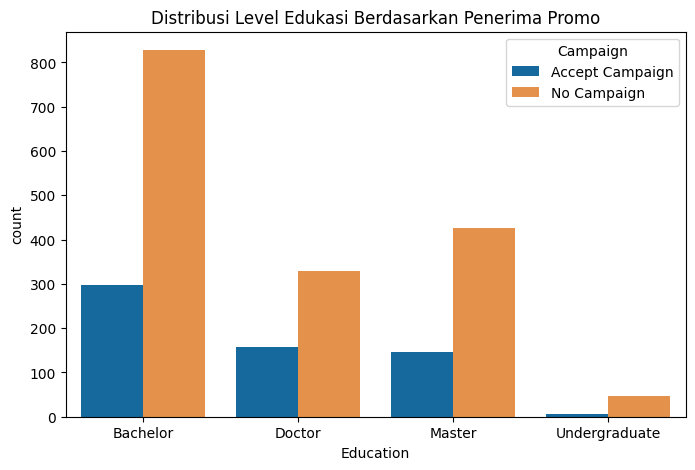

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Education', hue='Campaign', palette=pal)
plt.title('Distribusi Level Edukasi Berdasarkan Penerima Promo')
plt.show()

In [47]:
df_education=pd.crosstab(df['Education'],df['Campaign'])
df_education['Total']=df_education.sum(axis=1)
df_education['Persentase']=df_education['Accept Campaign']/df_education['Total']*100
df_education

Campaign,Accept Campaign,No Campaign,Total,Persentase
Education,,,,
Bachelor,298,828,1126,26.465364
Doctor,158,328,486,32.510288
Master,146,427,573,25.479930
Undergraduate,7,47,54,12.962963


Temuan<br>
* Urutan level edukasi yang benar : **Undergraduate < Bachelor < Master < Doctor**
* Jika dilihat dari persentase, semakin tinggi edukasi, kemungkinan melakukan transaksi saat promo juga semakin tinggi, untuk level edukasi bachelor dan master terjadi hal sebaliknya, tetapi karena tidak terpaut terlalu jauh (hanya 1%), maka aman untuk tetap mempertahankan pernyataan awal.
Hal ini dikarenakan semakin tinggi edukasi yang dimiliki seseorang, maka akan akan cenderung semakin jeli dalam berbelanja, terutama tentang pembelian saat ada promo.

# KESIMPULAN & SARAN
## Kesimpulan
Beberapa hal dapat disimpulkan, yaitu
* Besaran income dari pelanggan memiliki hubungan dengan kegiatan belanja saat promo, dimana pelanggan dengan income yang lebih tinggi cenderung lebih mungkin untuk melakukan transaksi saat promo.
* Wine dan daging merupakan komoditi yang paling banyak dibeli saat promo.
* Umur pelanggan tidak mempengaruhi kecenderungan mereka untuk berbelanja saat promo.
* Pasangan dan anak menyebabkan pelanggan cenderung melakukan pembelian tanpa promo.
* Semakin tinggi level pendidikan, kecenderungan untuk melakukan transaksi pada saat promo semakin tinggi.
## Saran
Lebih baik promosi difokuskan untuk pelanggan yang memiliki kecenderungan yang lebih tinggi untuk melakukan pembelian saat promo, dengan kriteria berikut :
* Memiliki income yang lebih besar dari rata-rata.
* Hidup sendiri tanpa pasangan dan anak.
* Memiliki level pendidikan yang tinggi.<br><br>

Sedangkan untuk komoditi, **anggur (wine)** dan **daging** adalah komoditi yang wajib sedia saat melakukan promosi, terutama yang dijual dari katalog, karena saat promosi volume pembelian akan bertambah disana.